In [25]:
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt
import os
from keras.layers import Input, Dense, Lambda
from keras.models import Model

In [2]:
datapath = "E:\\Development Project\\Data\\GNPS Binned" #Absolute path for data.
numSamples = 100 
numFeatures = 2995

In [3]:
def rolling_window_filter(a):
    b = np.zeros([numFeatures, 1], float)
    print("Start:")
    for i in range(len(a)):
        lowend = 0
        if i<50:
            lowend = i  # If there are fewer than 50 bins behind current windows, only go back to index 0.
        if i>=50:
            lowend = 50  # Else, go back 50 indices.
        print(len(a[i-lowend:i+50]))
        comp = np.less(a[i], a[i-lowend:(i+50)])  # Compare current value to values for all bins in 100Da range
        # print(comp)
        if np.sum(comp)<7:  # If value is among top 6 in 100Da range, add it to final array b.
            b[i] = a[i]
        #if np.sum(comp)>93:
            # print(str(i) + ": " + str(np.sum(comp)))

    # Comparison prints of unfiltered and filtered arrays.
    # print(a.size)
    # print(a.shape)
    # print(np.amax(a))
    print(np.count_nonzero(a))
    # print(b.size)
    # print(b.shape)
    # print(np.amax(b))
    print(np.count_nonzero(b))
    return b

In [4]:
def load_data():
    data = np.zeros([numFeatures, 0], float)
    for file in os.listdir(datapath):
        if file.endswith(".txt"):
            print(file)
            min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
            filepath = os.path.join(datapath, file)
            temp = np.loadtxt(filepath, np.float64, usecols = 2) #U ses only the 3rd column, where intensities are stored.
            temp = temp.reshape(-1, 1)
            print(np.amax(temp))
            # temp = rolling_window_filter(temp)
            temp = min_max_scaler.fit_transform(temp)
            # temp = rolling_window_filter(temp)
            data = np.concatenate([data, temp], axis=1)

    print("Done")
    return data

In [5]:
def load_bin_values():
    for file in os.listdir(datapath):
        if file.endswith(".txt"):
            filepath = os.path.join(datapath, file)
            temp = np.loadtxt(filepath, np.float64, usecols=0)  # Grabs only the lower bound value for each bin
            temp = temp.reshape(-1, 1)
            temp = temp + 0.5  # Round values up to nearest integer.
            return temp  # End loop on first run, only need one batch of values.


In [6]:
main = load_data()
labels = load_bin_values()

print(main)
print(main.shape)
print(main.dtype)


CCMSLIB00000001548 binned.txt
109387080.0
CCMSLIB00000001549 binned.txt
32604272.0
CCMSLIB00000001550 binned.txt
43057184.0
CCMSLIB00000001555 binned.txt
367041.09
CCMSLIB00000001563 binned.txt
64301.03
CCMSLIB00000001565 binned.txt
9896.4
CCMSLIB00000001566 binned.txt
20734.69
CCMSLIB00000001568 binned.txt
333.72
CCMSLIB00000001569 binned.txt
103564.98
CCMSLIB00000001570 binned.txt
811.76
CCMSLIB00000001572 binned.txt
1546.8
CCMSLIB00000001574 binned.txt
5483.52
CCMSLIB00000001576 binned.txt
10734.39
CCMSLIB00000001581 binned.txt
19181776.0
CCMSLIB00000001590 binned.txt
172760.3
CCMSLIB00000001598 binned.txt
8115.84
CCMSLIB00000001600 binned.txt
26551.12
CCMSLIB00000001601 binned.txt
5995577.0
CCMSLIB00000001602 binned.txt
7592.63
CCMSLIB00000001603 binned.txt
111843406.0
CCMSLIB00000001604 binned.txt
35997.72
CCMSLIB00000001606 binned.txt
154432.59
CCMSLIB00000001607 binned.txt
317436.59
CCMSLIB00000001608 binned.txt
64228456.0
CCMSLIB00000001609 binned.txt
1634.13
CCMSLIB00000001615

383733.0
CCMSLIB00000004963 binned.txt
146678.19
CCMSLIB00000004978 binned.txt
25968.42
CCMSLIB00000004984 binned.txt
447278.36
CCMSLIB00000004987 binned.txt
807697.53
CCMSLIB00000004996 binned.txt
147065.76
CCMSLIB00000004999 binned.txt
136797.66
CCMSLIB00000005002 binned.txt
7883.92
CCMSLIB00000005005 binned.txt
147258.78
CCMSLIB00000005017 binned.txt
117600.76
CCMSLIB00000005026 binned.txt
402921.95
CCMSLIB00000005032 binned.txt
100419.45
CCMSLIB00000005041 binned.txt
3917.61
CCMSLIB00000005047 binned.txt
3850.51
CCMSLIB00000005053 binned.txt
76281.9
CCMSLIB00000005076 binned.txt
70365.62
CCMSLIB00000005079 binned.txt
20947.4
CCMSLIB00000005091 binned.txt
69011.62
CCMSLIB00000005094 binned.txt
33003.79
CCMSLIB00000005097 binned.txt
1657.53
CCMSLIB00000005100 binned.txt
6014.89
CCMSLIB00000005103 binned.txt
133925.45
CCMSLIB00000005106 binned.txt
93176.17
CCMSLIB00000005109 binned.txt
735724.56
CCMSLIB00000005130 binned.txt
29401.11
CCMSLIB00000005133 binned.txt
30834.7
CCMSLIB000000

CCMSLIB00000006259 binned.txt
596291.1
CCMSLIB00000006262 binned.txt
519479.62
CCMSLIB00000006265 binned.txt
6047.85
CCMSLIB00000006268 binned.txt
8514.93
CCMSLIB00000006271 binned.txt
417.1
CCMSLIB00000006277 binned.txt
241747.67
CCMSLIB00000006280 binned.txt
3870.16
CCMSLIB00000006289 binned.txt
20742.38
CCMSLIB00000006292 binned.txt
21271.32
CCMSLIB00000006295 binned.txt
4169.52
CCMSLIB00000006301 binned.txt
205913.28
CCMSLIB00000006304 binned.txt
7333.18
CCMSLIB00000006307 binned.txt
346520.0
CCMSLIB00000006310 binned.txt
45133.6
CCMSLIB00000006313 binned.txt
3056.08
CCMSLIB00000006316 binned.txt
100941.36
CCMSLIB00000006331 binned.txt
8030.23
CCMSLIB00000006337 binned.txt
1745.83
CCMSLIB00000006340 binned.txt
3629.21
CCMSLIB00000006355 binned.txt
13767.36
CCMSLIB00000006364 binned.txt
229901.49
CCMSLIB00000006367 binned.txt
14717.83
CCMSLIB00000006370 binned.txt
2395.38
CCMSLIB00000006373 binned.txt
45425.65
CCMSLIB00000006376 binned.txt
7565.01
CCMSLIB00000006379 binned.txt
74330

CCMSLIB00000072237 binned.txt
6217.87
CCMSLIB00000072245 binned.txt
249.34
CCMSLIB00000072257 binned.txt
150.96
CCMSLIB00000072258 binned.txt
619.79
CCMSLIB00000072259 binned.txt
519.68
CCMSLIB00000072260 binned.txt
1386.31
CCMSLIB00000072261 binned.txt
3358.77
CCMSLIB00000072262 binned.txt
6350.31
CCMSLIB00000072263 binned.txt
426.95
CCMSLIB00000072269 binned.txt
901.37
CCMSLIB00000072270 binned.txt
2858.14
CCMSLIB00000072271 binned.txt
9275.09
CCMSLIB00000072284 binned.txt
78933.0
CCMSLIB00000072309 binned.txt
12714.92
CCMSLIB00000072310 binned.txt
10057.17
CCMSLIB00000072553 binned.txt
5737.0
CCMSLIB00000072558 binned.txt
50184.0
CCMSLIB00000072561 binned.txt
14076298.0
CCMSLIB00000072565 binned.txt
1700.0
CCMSLIB00000072567 binned.txt
30581.24
CCMSLIB00000074971 binned.txt
552692.88
CCMSLIB00000074973 binned.txt
2380339.7
CCMSLIB00000074974 binned.txt
2160525.51
CCMSLIB00000074975 binned.txt
977274.21
CCMSLIB00000075009 binned.txt
2467.33
CCMSLIB00000075010 binned.txt
132.18
CCMSLI

CCMSLIB00000078035 binned.txt
203848.0
CCMSLIB00000078036 binned.txt
18524.0
CCMSLIB00000078037 binned.txt
142368.0
CCMSLIB00000078038 binned.txt
5900.0
CCMSLIB00000078039 binned.txt
58684.0
CCMSLIB00000078040 binned.txt
361696.0
CCMSLIB00000078041 binned.txt
324724.0
CCMSLIB00000078044 binned.txt
85952.0
CCMSLIB00000078045 binned.txt
227900.0
CCMSLIB00000078046 binned.txt
249016.0
CCMSLIB00000078047 binned.txt
118084.0
CCMSLIB00000078048 binned.txt
143416.0
CCMSLIB00000078049 binned.txt
219720.0
CCMSLIB00000078050 binned.txt
214544.0
CCMSLIB00000078051 binned.txt
24356.0
CCMSLIB00000078052 binned.txt
25580.0
CCMSLIB00000078053 binned.txt
68764.0
CCMSLIB00000078054 binned.txt
94416.0
CCMSLIB00000078056 binned.txt
110424.0
CCMSLIB00000078057 binned.txt
287092.0
CCMSLIB00000078058 binned.txt
192548.0
CCMSLIB00000078059 binned.txt
192432.0
CCMSLIB00000078060 binned.txt
3920.0
CCMSLIB00000078061 binned.txt
10060.0
CCMSLIB00000078063 binned.txt
28532.0
CCMSLIB00000078064 binned.txt
202420.0

11688.0
CCMSLIB00000078282 binned.txt
88136.0
CCMSLIB00000078284 binned.txt
210520.0
CCMSLIB00000078285 binned.txt
180152.0
CCMSLIB00000078286 binned.txt
255880.0
CCMSLIB00000078287 binned.txt
37872.0
CCMSLIB00000078288 binned.txt
80976.0
CCMSLIB00000078289 binned.txt
139320.0
CCMSLIB00000078290 binned.txt
71024.0
CCMSLIB00000078291 binned.txt
134340.0
CCMSLIB00000078292 binned.txt
18224.0
CCMSLIB00000078293 binned.txt
282672.0
CCMSLIB00000078294 binned.txt
15348.0
CCMSLIB00000078295 binned.txt
109760.0
CCMSLIB00000078296 binned.txt
55324.0
CCMSLIB00000078297 binned.txt
254444.0
CCMSLIB00000078298 binned.txt
25440.0
CCMSLIB00000078299 binned.txt
43248.0
CCMSLIB00000078300 binned.txt
77660.0
CCMSLIB00000078301 binned.txt
402904.0
CCMSLIB00000078303 binned.txt
230860.0
CCMSLIB00000078304 binned.txt
11396.0
CCMSLIB00000078305 binned.txt
258320.0
CCMSLIB00000078306 binned.txt
250452.0
CCMSLIB00000078307 binned.txt
361784.0
CCMSLIB00000078309 binned.txt
105652.0
CCMSLIB00000078310 binned.tx

CCMSLIB00000078542 binned.txt
235356.0
CCMSLIB00000078543 binned.txt
4904.0
CCMSLIB00000078544 binned.txt
202604.0
CCMSLIB00000078546 binned.txt
61952.0
CCMSLIB00000078547 binned.txt
85760.0
CCMSLIB00000078548 binned.txt
84932.0
CCMSLIB00000078549 binned.txt
136628.0
CCMSLIB00000078550 binned.txt
397500.0
CCMSLIB00000078552 binned.txt
41924.0
CCMSLIB00000078553 binned.txt
41852.0
CCMSLIB00000078556 binned.txt
420440.0
CCMSLIB00000078557 binned.txt
339808.0
CCMSLIB00000078558 binned.txt
360440.0
CCMSLIB00000078559 binned.txt
391964.0
CCMSLIB00000078560 binned.txt
281120.0
CCMSLIB00000078561 binned.txt
244136.0
CCMSLIB00000078562 binned.txt
226580.0
CCMSLIB00000078564 binned.txt
251304.0
CCMSLIB00000078566 binned.txt
189944.0
CCMSLIB00000078567 binned.txt
22076.0
CCMSLIB00000078568 binned.txt
187792.0
CCMSLIB00000078569 binned.txt
6440.0
CCMSLIB00000078570 binned.txt
11068.0
CCMSLIB00000078571 binned.txt
152088.0
CCMSLIB00000078572 binned.txt
23420.0
CCMSLIB00000078573 binned.txt
238596.

279696.0
CCMSLIB00000078804 binned.txt
72888.0
CCMSLIB00000078805 binned.txt
67204.0
CCMSLIB00000078806 binned.txt
2668.0
CCMSLIB00000078807 binned.txt
8672.0
CCMSLIB00000078808 binned.txt
42420.0
CCMSLIB00000078809 binned.txt
14852.0
CCMSLIB00000078810 binned.txt
57236.0
CCMSLIB00000078811 binned.txt
80768.0
CCMSLIB00000078812 binned.txt
57008.0
CCMSLIB00000078813 binned.txt
79756.0
CCMSLIB00000078814 binned.txt
15112.0
CCMSLIB00000078815 binned.txt
27880.0
CCMSLIB00000078816 binned.txt
3564.0
CCMSLIB00000078817 binned.txt
31964.0
CCMSLIB00000078818 binned.txt
40132.0
CCMSLIB00000078819 binned.txt
36764.0
CCMSLIB00000078820 binned.txt
16828.0
CCMSLIB00000078821 binned.txt
113316.0
CCMSLIB00000078822 binned.txt
30908.0
CCMSLIB00000078845 binned.txt
46322.0
CCMSLIB00000078850 binned.txt
5492.0
CCMSLIB00000078851 binned.txt
14171.0
CCMSLIB00000078852 binned.txt
48258.0
CCMSLIB00000078855 binned.txt
82266.0
CCMSLIB00000078856 binned.txt
48366.0
CCMSLIB00000078857 binned.txt
19488.0
CCMSLI

425840.0
CCMSLIB00000079102 binned.txt
215704.0
CCMSLIB00000079104 binned.txt
66956.0
CCMSLIB00000079105 binned.txt
84152.0
CCMSLIB00000079106 binned.txt
255868.0
CCMSLIB00000079107 binned.txt
4080.0
CCMSLIB00000079108 binned.txt
263664.0
CCMSLIB00000079110 binned.txt
59252.0
CCMSLIB00000079111 binned.txt
37408.0
CCMSLIB00000079112 binned.txt
252644.0
CCMSLIB00000079113 binned.txt
300964.0
CCMSLIB00000079114 binned.txt
149356.0
CCMSLIB00000079115 binned.txt
237992.0
CCMSLIB00000079116 binned.txt
43988.0
CCMSLIB00000079117 binned.txt
283864.0
CCMSLIB00000079118 binned.txt
110416.0
CCMSLIB00000079119 binned.txt
8192.0
CCMSLIB00000079120 binned.txt
11060.0
CCMSLIB00000079121 binned.txt
83544.0
CCMSLIB00000079122 binned.txt
70576.0
CCMSLIB00000079123 binned.txt
126344.0
CCMSLIB00000079124 binned.txt
216960.0
CCMSLIB00000079125 binned.txt
264112.0
CCMSLIB00000079126 binned.txt
6660.0
CCMSLIB00000079127 binned.txt
408512.0
CCMSLIB00000079128 binned.txt
7360.0
CCMSLIB00000079129 binned.txt
42

74876.0
CCMSLIB00000079416 binned.txt
318436.0
CCMSLIB00000079417 binned.txt
28444.0
CCMSLIB00000079418 binned.txt
7652.0
CCMSLIB00000079419 binned.txt
15640.0
CCMSLIB00000079420 binned.txt
42344.0
CCMSLIB00000079421 binned.txt
220404.0
CCMSLIB00000079422 binned.txt
21512.0
CCMSLIB00000079423 binned.txt
87160.0
CCMSLIB00000079424 binned.txt
84496.0
CCMSLIB00000079425 binned.txt
100768.0
CCMSLIB00000079427 binned.txt
10196.0
CCMSLIB00000079428 binned.txt
8848.0
CCMSLIB00000079429 binned.txt
7280.0
CCMSLIB00000079430 binned.txt
132424.0
CCMSLIB00000079431 binned.txt
242568.0
CCMSLIB00000079432 binned.txt
15924.0
CCMSLIB00000079433 binned.txt
109352.0
CCMSLIB00000079434 binned.txt
10260.0
CCMSLIB00000079435 binned.txt
63376.0
CCMSLIB00000079436 binned.txt
79564.0
CCMSLIB00000079437 binned.txt
5388.0
CCMSLIB00000079438 binned.txt
185500.0
CCMSLIB00000079439 binned.txt
52228.0
CCMSLIB00000079440 binned.txt
14936.0
CCMSLIB00000079441 binned.txt
14348.0
CCMSLIB00000079442 binned.txt
736.0
CCM

CCMSLIB00000079633 binned.txt
16896.0
CCMSLIB00000079634 binned.txt
117960.0
CCMSLIB00000079635 binned.txt
5036.0
CCMSLIB00000079636 binned.txt
11932.0
CCMSLIB00000079637 binned.txt
60036.0
CCMSLIB00000079638 binned.txt
27136.0
CCMSLIB00000079639 binned.txt
5456.0
CCMSLIB00000079640 binned.txt
1008.0
CCMSLIB00000079641 binned.txt
11412.0
CCMSLIB00000079642 binned.txt
17484.0
CCMSLIB00000079643 binned.txt
86260.0
CCMSLIB00000079644 binned.txt
104172.0
CCMSLIB00000079645 binned.txt
17936.0
CCMSLIB00000079646 binned.txt
127196.0
CCMSLIB00000079647 binned.txt
32992.0
CCMSLIB00000079648 binned.txt
2248.0
CCMSLIB00000079649 binned.txt
41988.0
CCMSLIB00000079650 binned.txt
167608.0
CCMSLIB00000079651 binned.txt
6248.0
CCMSLIB00000079652 binned.txt
273864.0
CCMSLIB00000079653 binned.txt
47564.0
CCMSLIB00000079654 binned.txt
91016.0
CCMSLIB00000079655 binned.txt
144940.0
CCMSLIB00000079656 binned.txt
150512.0
CCMSLIB00000079658 binned.txt
372484.0
CCMSLIB00000079659 binned.txt
29308.0
CCMSLIB00

CCMSLIB00000079855 binned.txt
76632.0
CCMSLIB00000079856 binned.txt
6540.0
CCMSLIB00000079857 binned.txt
18428.0
CCMSLIB00000079859 binned.txt
85328.0
CCMSLIB00000079860 binned.txt
84816.0
CCMSLIB00000079861 binned.txt
374024.0
CCMSLIB00000079862 binned.txt
39044.0
CCMSLIB00000079864 binned.txt
345064.0
CCMSLIB00000079865 binned.txt
103172.0
CCMSLIB00000079866 binned.txt
102744.0
CCMSLIB00000079867 binned.txt
69380.0
CCMSLIB00000079868 binned.txt
64368.0
CCMSLIB00000079869 binned.txt
314048.0
CCMSLIB00000079870 binned.txt
146132.0
CCMSLIB00000079871 binned.txt
83284.0
CCMSLIB00000079872 binned.txt
74552.0
CCMSLIB00000079873 binned.txt
148432.0
CCMSLIB00000079874 binned.txt
1312.0
CCMSLIB00000079875 binned.txt
84204.0
CCMSLIB00000079876 binned.txt
142492.0
CCMSLIB00000079877 binned.txt
240452.0
CCMSLIB00000079878 binned.txt
49912.0
CCMSLIB00000079879 binned.txt
53468.0
CCMSLIB00000079880 binned.txt
24504.0
CCMSLIB00000079881 binned.txt
35860.0
CCMSLIB00000079882 binned.txt
41784.0
CCMSL

CCMSLIB00000080076 binned.txt
316444.0
CCMSLIB00000080077 binned.txt
16416.0
CCMSLIB00000080078 binned.txt
24212.0
CCMSLIB00000080079 binned.txt
81504.0
CCMSLIB00000080080 binned.txt
84460.0
CCMSLIB00000080081 binned.txt
15832.0
CCMSLIB00000080082 binned.txt
147380.0
CCMSLIB00000080084 binned.txt
6932.0
CCMSLIB00000080085 binned.txt
40180.0
CCMSLIB00000080086 binned.txt
251068.0
CCMSLIB00000080087 binned.txt
3008.0
CCMSLIB00000080088 binned.txt
147404.0
CCMSLIB00000080089 binned.txt
48904.0
CCMSLIB00000080090 binned.txt
6308.0
CCMSLIB00000080091 binned.txt
100564.0
CCMSLIB00000080092 binned.txt
2624.0
CCMSLIB00000080093 binned.txt
67888.0
CCMSLIB00000080094 binned.txt
83296.0
CCMSLIB00000080095 binned.txt
67424.0
CCMSLIB00000080096 binned.txt
21508.0
CCMSLIB00000080097 binned.txt
77628.0
CCMSLIB00000080098 binned.txt
84580.0
CCMSLIB00000080099 binned.txt
10720.0
CCMSLIB00000080100 binned.txt
6248.0
CCMSLIB00000080101 binned.txt
6844.0
CCMSLIB00000080102 binned.txt
226320.0
CCMSLIB00000

CCMSLIB00000080297 binned.txt
416684.0
CCMSLIB00000080298 binned.txt
161692.0
CCMSLIB00000080299 binned.txt
514828.0
CCMSLIB00000080300 binned.txt
52612.0
CCMSLIB00000080301 binned.txt
281616.0
CCMSLIB00000080302 binned.txt
145496.0
CCMSLIB00000080303 binned.txt
8856.0
CCMSLIB00000080304 binned.txt
190872.0
CCMSLIB00000080305 binned.txt
331168.0
CCMSLIB00000080306 binned.txt
140760.0
CCMSLIB00000080307 binned.txt
108728.0
CCMSLIB00000080308 binned.txt
58992.0
CCMSLIB00000080309 binned.txt
5924.0
CCMSLIB00000080310 binned.txt
227004.0
CCMSLIB00000080311 binned.txt
284580.0
CCMSLIB00000080312 binned.txt
36792.0
CCMSLIB00000080313 binned.txt
334264.0
CCMSLIB00000080314 binned.txt
258456.0
CCMSLIB00000080315 binned.txt
25172.0
CCMSLIB00000080316 binned.txt
3728.0
CCMSLIB00000080317 binned.txt
130328.0
CCMSLIB00000080318 binned.txt
61456.0
CCMSLIB00000080319 binned.txt
34000.0
CCMSLIB00000080320 binned.txt
170440.0
CCMSLIB00000080321 binned.txt
127080.0
CCMSLIB00000080322 binned.txt
110592.

134112.0
CCMSLIB00000080516 binned.txt
22420.0
CCMSLIB00000080517 binned.txt
32216.0
CCMSLIB00000080518 binned.txt
12076.0
CCMSLIB00000080519 binned.txt
96412.0
CCMSLIB00000080520 binned.txt
320116.0
CCMSLIB00000080521 binned.txt
74244.0
CCMSLIB00000080522 binned.txt
220140.0
CCMSLIB00000080523 binned.txt
416352.0
CCMSLIB00000080524 binned.txt
30460.0
CCMSLIB00000080525 binned.txt
41996.0
CCMSLIB00000080526 binned.txt
10684.0
CCMSLIB00000080527 binned.txt
5088.0
CCMSLIB00000080528 binned.txt
6736.0
CCMSLIB00000080529 binned.txt
8672.0
CCMSLIB00000080530 binned.txt
63416.0
CCMSLIB00000080531 binned.txt
1904.0
CCMSLIB00000080532 binned.txt
95672.0
CCMSLIB00000080533 binned.txt
67568.0
CCMSLIB00000080534 binned.txt
4408.0
CCMSLIB00000080535 binned.txt
5864.0
CCMSLIB00000080536 binned.txt
191192.0
CCMSLIB00000080537 binned.txt
2048.0
CCMSLIB00000080538 binned.txt
13480.0
CCMSLIB00000080539 binned.txt
106732.0
CCMSLIB00000080540 binned.txt
17076.0
CCMSLIB00000080541 binned.txt
423328.0
CCMS

CCMSLIB00000081764 binned.txt
41.0
CCMSLIB00000081770 binned.txt
2666.0
CCMSLIB00000081772 binned.txt
562.0
CCMSLIB00000081779 binned.txt
1230227.3
CCMSLIB00000081780 binned.txt
17957287.34
CCMSLIB00000081781 binned.txt
1188643.48
CCMSLIB00000081782 binned.txt
91532648.0
CCMSLIB00000081783 binned.txt
4869919.5
CCMSLIB00000081784 binned.txt
2648244.79
CCMSLIB00000081785 binned.txt
1032182.37
CCMSLIB00000081786 binned.txt
7306362.32
CCMSLIB00000081800 binned.txt
993099.84
CCMSLIB00000081801 binned.txt
828352.88
CCMSLIB00000081802 binned.txt
2702894.0
CCMSLIB00000081803 binned.txt
760278.3
CCMSLIB00000081804 binned.txt
2884032.75
CCMSLIB00000081805 binned.txt
640529.61
CCMSLIB00000081806 binned.txt
1344439.5
CCMSLIB00000081807 binned.txt
3087739.89
CCMSLIB00000081808 binned.txt
1800518.25
CCMSLIB00000081809 binned.txt
1224769.4
CCMSLIB00000081813 binned.txt
6976.0
CCMSLIB00000084736 binned.txt
7108.0
CCMSLIB00000084737 binned.txt
18044.0
CCMSLIB00000084738 binned.txt
5624.0
CCMSLIB0000008

CCMSLIB00000084948 binned.txt
9020.0
CCMSLIB00000084949 binned.txt
41940.0
CCMSLIB00000084950 binned.txt
10892.0
CCMSLIB00000084951 binned.txt
3804.0
CCMSLIB00000084952 binned.txt
47720.0
CCMSLIB00000084953 binned.txt
112384.0
CCMSLIB00000084954 binned.txt
4684.0
CCMSLIB00000084955 binned.txt
44148.0
CCMSLIB00000084956 binned.txt
58048.0
CCMSLIB00000084958 binned.txt
14152.0
CCMSLIB00000084959 binned.txt
1840.0
CCMSLIB00000084960 binned.txt
15724.0
CCMSLIB00000084961 binned.txt
67452.0
CCMSLIB00000084962 binned.txt
41072.0
CCMSLIB00000084963 binned.txt
7428.0
CCMSLIB00000084964 binned.txt
23952.0
CCMSLIB00000084965 binned.txt
259016.0
CCMSLIB00000084966 binned.txt
888.0
CCMSLIB00000084967 binned.txt
7840.0
CCMSLIB00000084968 binned.txt
134520.0
CCMSLIB00000084971 binned.txt
160680.0
CCMSLIB00000084972 binned.txt
12532.0
CCMSLIB00000084973 binned.txt
17572.0
CCMSLIB00000084974 binned.txt
5448.0
CCMSLIB00000084975 binned.txt
17712.0
CCMSLIB00000084976 binned.txt
89404.0
CCMSLIB0000008497

13284.0
CCMSLIB00000085207 binned.txt
468100.0
CCMSLIB00000085209 binned.txt
5524.0
CCMSLIB00000085210 binned.txt
12704.0
CCMSLIB00000085211 binned.txt
33116.0
CCMSLIB00000085212 binned.txt
4368.0
CCMSLIB00000085213 binned.txt
3800.0
CCMSLIB00000085214 binned.txt
158760.0
CCMSLIB00000085215 binned.txt
23760.0
CCMSLIB00000085216 binned.txt
49024.0
CCMSLIB00000085217 binned.txt
69148.0
CCMSLIB00000085219 binned.txt
131728.0
CCMSLIB00000085222 binned.txt
4172.0
CCMSLIB00000085224 binned.txt
20536.0
CCMSLIB00000085225 binned.txt
6536.0
CCMSLIB00000085226 binned.txt
265932.0
CCMSLIB00000085228 binned.txt
5380.0
CCMSLIB00000085229 binned.txt
86368.0
CCMSLIB00000085230 binned.txt
15632.0
CCMSLIB00000085231 binned.txt
11136.0
CCMSLIB00000085232 binned.txt
123152.0
CCMSLIB00000085234 binned.txt
156980.0
CCMSLIB00000085235 binned.txt
70604.0
CCMSLIB00000085236 binned.txt
288276.0
CCMSLIB00000085237 binned.txt
3060.0
CCMSLIB00000085238 binned.txt
25700.0
CCMSLIB00000085239 binned.txt
10748.0
CCMS

CCMSLIB00000085449 binned.txt
40832.0
CCMSLIB00000085450 binned.txt
57692.0
CCMSLIB00000085451 binned.txt
44940.0
CCMSLIB00000085452 binned.txt
82420.0
CCMSLIB00000085453 binned.txt
222868.0
CCMSLIB00000085454 binned.txt
200304.0
CCMSLIB00000085455 binned.txt
121644.0
CCMSLIB00000085456 binned.txt
4260.0
CCMSLIB00000085457 binned.txt
228208.0
CCMSLIB00000085458 binned.txt
21804.0
CCMSLIB00000085459 binned.txt
234452.0
CCMSLIB00000085460 binned.txt
37092.0
CCMSLIB00000085461 binned.txt
2064.0
CCMSLIB00000085462 binned.txt
24304.0
CCMSLIB00000085463 binned.txt
301644.0
CCMSLIB00000085464 binned.txt
232004.0
CCMSLIB00000085465 binned.txt
41000.0
CCMSLIB00000085466 binned.txt
33600.0
CCMSLIB00000085467 binned.txt
486348.0
CCMSLIB00000085468 binned.txt
278812.0
CCMSLIB00000085469 binned.txt
49236.0
CCMSLIB00000085470 binned.txt
61984.0
CCMSLIB00000085471 binned.txt
10536.0
CCMSLIB00000085472 binned.txt
216848.0
CCMSLIB00000085473 binned.txt
144496.0
CCMSLIB00000085474 binned.txt
27136.0
CCM

CCMSLIB00000085680 binned.txt
44988.0
CCMSLIB00000085681 binned.txt
465200.0
CCMSLIB00000085682 binned.txt
17492.0
CCMSLIB00000085683 binned.txt
26988.0
CCMSLIB00000085684 binned.txt
46332.0
CCMSLIB00000085685 binned.txt
23812.0
CCMSLIB00000085686 binned.txt
7228.0
CCMSLIB00000085688 binned.txt
96660.0
CCMSLIB00000085689 binned.txt
320804.0
CCMSLIB00000085690 binned.txt
102704.0
CCMSLIB00000085691 binned.txt
18088.0
CCMSLIB00000085692 binned.txt
99284.0
CCMSLIB00000085693 binned.txt
13812.0
CCMSLIB00000085695 binned.txt
20796.0
CCMSLIB00000085696 binned.txt
5636.0
CCMSLIB00000085697 binned.txt
17176.0
CCMSLIB00000085698 binned.txt
73516.0
CCMSLIB00000085699 binned.txt
351264.0
CCMSLIB00000085700 binned.txt
27080.0
CCMSLIB00000085701 binned.txt
141276.0
CCMSLIB00000085702 binned.txt
218024.0
CCMSLIB00000085703 binned.txt
12500.0
CCMSLIB00000085704 binned.txt
4684.0
CCMSLIB00000085705 binned.txt
199148.0
CCMSLIB00000085706 binned.txt
245880.0
CCMSLIB00000085707 binned.txt
94556.0
CCMSLIB

CCMSLIB00000085915 binned.txt
10188.0
CCMSLIB00000085916 binned.txt
64384.0
CCMSLIB00000085917 binned.txt
314376.0
CCMSLIB00000085918 binned.txt
42516.0
CCMSLIB00000085919 binned.txt
6552.0
CCMSLIB00000085920 binned.txt
7504.0
CCMSLIB00000085921 binned.txt
219540.0
CCMSLIB00000085922 binned.txt
401564.0
CCMSLIB00000085923 binned.txt
13792.0
CCMSLIB00000085924 binned.txt
191372.0
CCMSLIB00000085925 binned.txt
481496.0
CCMSLIB00000085926 binned.txt
173368.0
CCMSLIB00000085927 binned.txt
93580.0
CCMSLIB00000085928 binned.txt
5640.0
CCMSLIB00000085929 binned.txt
14316.0
CCMSLIB00000085930 binned.txt
2836.0
CCMSLIB00000085931 binned.txt
503160.0
CCMSLIB00000085932 binned.txt
508836.0
CCMSLIB00000085933 binned.txt
326228.0
CCMSLIB00000085934 binned.txt
233788.0
CCMSLIB00000085935 binned.txt
131632.0
CCMSLIB00000085936 binned.txt
135288.0
CCMSLIB00000085937 binned.txt
1124.0
CCMSLIB00000085938 binned.txt
2624.0
CCMSLIB00000085939 binned.txt
227180.0
CCMSLIB00000085940 binned.txt
389836.0
CCMS

CCMSLIB00000086147 binned.txt
1300.0
CCMSLIB00000086149 binned.txt
6760.0
CCMSLIB00000086150 binned.txt
62028.0
CCMSLIB00000086151 binned.txt
79252.0
CCMSLIB00000086152 binned.txt
75968.0
CCMSLIB00000086153 binned.txt
155620.0
CCMSLIB00000086156 binned.txt
2476.0
CCMSLIB00000086157 binned.txt
424380.0
CCMSLIB00000086158 binned.txt
149308.0
CCMSLIB00000086159 binned.txt
11700.0
CCMSLIB00000086160 binned.txt
24156.0
CCMSLIB00000086161 binned.txt
38352.0
CCMSLIB00000086162 binned.txt
268080.0
CCMSLIB00000086163 binned.txt
3488.0
CCMSLIB00000086164 binned.txt
1808.0
CCMSLIB00000086165 binned.txt
5296.0
CCMSLIB00000086166 binned.txt
34388.0
CCMSLIB00000086167 binned.txt
82388.0
CCMSLIB00000086168 binned.txt
46976.0
CCMSLIB00000086169 binned.txt
25940.0
CCMSLIB00000086170 binned.txt
9848.0
CCMSLIB00000086171 binned.txt
2476.0
CCMSLIB00000086172 binned.txt
17728.0
CCMSLIB00000086173 binned.txt
134108.0
CCMSLIB00000086174 binned.txt
17140.0
CCMSLIB00000086175 binned.txt
57584.0
CCMSLIB00000086

2276.0
CCMSLIB00000424913 binned.txt
60504.0
CCMSLIB00000424915 binned.txt
53132.0
CCMSLIB00000424916 binned.txt
1636.0
CCMSLIB00000424917 binned.txt
416.0
CCMSLIB00000424918 binned.txt
22928.0
CCMSLIB00000424920 binned.txt
868592.0
CCMSLIB00000424922 binned.txt
6940.0
CCMSLIB00000424923 binned.txt
7728.0
CCMSLIB00000424924 binned.txt
120224.0
CCMSLIB00000424925 binned.txt
22263906.0
CCMSLIB00000424937 binned.txt
2000.0
CCMSLIB00000424942 binned.txt
3884.0
CCMSLIB00000424946 binned.txt
1704.0
CCMSLIB00000424950 binned.txt
111812.0
CCMSLIB00000424951 binned.txt
291144.0
CCMSLIB00000424956 binned.txt
23912.0
CCMSLIB00000424959 binned.txt
27184.0
CCMSLIB00000424963 binned.txt
8656.0
CCMSLIB00000424965 binned.txt
98848.0
CCMSLIB00000424966 binned.txt
29296.0
CCMSLIB00000424967 binned.txt
92508.0
CCMSLIB00000424968 binned.txt
30356.0
CCMSLIB00000424969 binned.txt
2548.0
CCMSLIB00000424970 binned.txt
41548.0
CCMSLIB00000424971 binned.txt
4064.0
CCMSLIB00000424972 binned.txt
6024.0
CCMSLIB000

CCMSLIB00000478509 binned.txt
431604.0
CCMSLIB00000478511 binned.txt
128152.0
CCMSLIB00000478512 binned.txt
444696.0
CCMSLIB00000478513 binned.txt
46728.0
CCMSLIB00000478514 binned.txt
425532.0
CCMSLIB00000478515 binned.txt
88424.0
CCMSLIB00000478516 binned.txt
58924.0
CCMSLIB00000478517 binned.txt
170804.0
CCMSLIB00000478518 binned.txt
202376.0
CCMSLIB00000478519 binned.txt
217788.0
CCMSLIB00000478520 binned.txt
255740.0
CCMSLIB00000478521 binned.txt
431604.0
CCMSLIB00000478522 binned.txt
392600.0
CCMSLIB00000478523 binned.txt
181240.0
CCMSLIB00000478524 binned.txt
264236.0
CCMSLIB00000478525 binned.txt
4184.0
CCMSLIB00000478526 binned.txt
31416.0
CCMSLIB00000478527 binned.txt
69952.0
CCMSLIB00000478528 binned.txt
10844.0
CCMSLIB00000478529 binned.txt
34796.0
CCMSLIB00000478530 binned.txt
12896.0
CCMSLIB00000478531 binned.txt
178904.0
CCMSLIB00000478532 binned.txt
188668.0
CCMSLIB00000478533 binned.txt
143720.0
CCMSLIB00000478536 binned.txt
10668.0
CCMSLIB00000478537 binned.txt
19376.

CCMSLIB00000577589 binned.txt
72480.0
CCMSLIB00000577590 binned.txt
548.0
CCMSLIB00000577591 binned.txt
4844.0
CCMSLIB00000577592 binned.txt
23160.0
CCMSLIB00000577593 binned.txt
4080.0
CCMSLIB00000577594 binned.txt
3292.0
CCMSLIB00000577595 binned.txt
15484.0
CCMSLIB00000577597 binned.txt
2612.0
CCMSLIB00000577598 binned.txt
16144.0
CCMSLIB00000577599 binned.txt
11104.0
CCMSLIB00000577604 binned.txt
46196.0
CCMSLIB00000577605 binned.txt
2084.0
CCMSLIB00000577606 binned.txt
24920.0
CCMSLIB00000577607 binned.txt
69096.0
CCMSLIB00000577608 binned.txt
232744.0
CCMSLIB00000577611 binned.txt
546164.0
CCMSLIB00000577612 binned.txt
9756.0
CCMSLIB00000577614 binned.txt
2240.0
CCMSLIB00000577615 binned.txt
144792.0
CCMSLIB00000577617 binned.txt
4844.0
CCMSLIB00000577618 binned.txt
96376.0
CCMSLIB00000577619 binned.txt
156772.0
CCMSLIB00000577620 binned.txt
40404.0
CCMSLIB00000577622 binned.txt
28592.0
CCMSLIB00000577624 binned.txt
9192.0
CCMSLIB00000577625 binned.txt
4180.0
CCMSLIB00000577626 b

CCMSLIB00000579498 binned.txt
298385632.0
CCMSLIB00000579500 binned.txt
22602332.0
CCMSLIB00000579502 binned.txt
61362776.0
CCMSLIB00000579504 binned.txt
306511968.0
CCMSLIB00000579506 binned.txt
9844533.0
CCMSLIB00000579508 binned.txt
45985340.0
CCMSLIB00000579510 binned.txt
212963824.0
CCMSLIB00000579512 binned.txt
36310664.0
CCMSLIB00000579514 binned.txt
1967439.38
CCMSLIB00000579516 binned.txt
74399016.0
CCMSLIB00000579519 binned.txt
123814824.0
CCMSLIB00000579520 binned.txt
105231808.0
CCMSLIB00000579522 binned.txt
10035472.0
CCMSLIB00000579525 binned.txt
72753096.0
CCMSLIB00000579527 binned.txt
16463831.0
CCMSLIB00000579529 binned.txt
711463.63
CCMSLIB00000579531 binned.txt
31359436.0
CCMSLIB00000579532 binned.txt
70716040.0
CCMSLIB00000579536 binned.txt
37106960.0
CCMSLIB00000579538 binned.txt
27655294.0
CCMSLIB00000579541 binned.txt
485370304.0
CCMSLIB00000579543 binned.txt
70316528.0
CCMSLIB00000579544 binned.txt
122784248.0
CCMSLIB00000579546 binned.txt
27393532.0
CCMSLIB0000

31513504.0
CCMSLIB00000579743 binned.txt
743491776.0
CCMSLIB00000579744 binned.txt
100.0
CCMSLIB00000579746 binned.txt
311825088.0
CCMSLIB00000579747 binned.txt
100.0
CCMSLIB00000579748 binned.txt
530985216.0
CCMSLIB00000579749 binned.txt
100.0
CCMSLIB00000579750 binned.txt
277053184.0
CCMSLIB00000579751 binned.txt
129224096.0
CCMSLIB00000579752 binned.txt
100.0
CCMSLIB00000579753 binned.txt
356871392.0
CCMSLIB00000579754 binned.txt
11990888.0
CCMSLIB00000579755 binned.txt
100.0
CCMSLIB00000579756 binned.txt
722200768.0
CCMSLIB00000579757 binned.txt
718140160.0
CCMSLIB00000579758 binned.txt
421065824.0
CCMSLIB00000579759 binned.txt
100.0
CCMSLIB00000579760 binned.txt
112068096.0
CCMSLIB00000579761 binned.txt
208976768.0
CCMSLIB00000579762 binned.txt
100.0
CCMSLIB00000579763 binned.txt
114671840.0
CCMSLIB00000579764 binned.txt
168621104.0
CCMSLIB00000579765 binned.txt
100.0
CCMSLIB00000579766 binned.txt
424377600.0
CCMSLIB00000579767 binned.txt
23397990.0
CCMSLIB00000579768 binned.txt
1

In [7]:
print(main)
print(main.shape)
print(main.dtype)
print(np.amax(main))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(2995, 5770)
float64
1.0


[0 0 0 ... 0 1 0]
(2995,)
3921


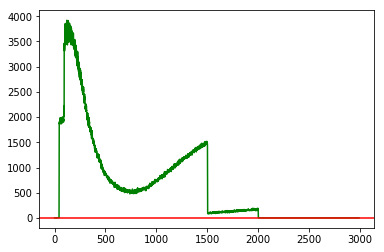

Number of bins with only 0s: 788
Number of bins with 1 non-zero: 190
Total number of bins with fewer than 6 non-zero values:1035


array([   0,    1,    2, ..., 2992, 2993, 2994], dtype=int64)

In [8]:
nonzeros = (np.count_nonzero(main, axis =1)) #Get count of non-zeros values for all bins.

print(nonzeros)
print(nonzeros.shape)
print(np.amax(nonzeros)) #Highest number of non-zeros out of all bins.

plt.plot(nonzeros, color = 'g')
plt.axhline(y = 6, color = 'r')
plt.show()

print("Number of bins with only 0s: " + str(len(np.where(nonzeros==0)[0])))

print("Number of bins with 1 non-zero: " + str(len(np.where(nonzeros==1)[0])))

print("Total number of bins with fewer than 6 non-zero values:" + str(len(np.where(nonzeros<6)[0])))

np.where(nonzeros<6)[0] #Indices of bins with <6 non-zero values.

In [9]:
testmain = main #Keep copy of untrimmed matrix, just in case.
testmain = np.delete(testmain, np.where(nonzeros<6)[0], axis = 0) #Remove features that have <6 non-zeros values.
print(testmain.shape)

nzero = (np.count_nonzero(testmain, axis =1))
print(len(np.where(nzero<6)[0])) #Verify that all <6 non-zero features were removed. Should output 0.

(1960, 5770)
0


In [10]:
maxVals = np.amax(testmain, axis=1) #Get max values for each feature.
print(maxVals[:10])
print(maxVals.shape)
print(len(np.where(maxVals<0.05)[0])) #Output number of bins with max value <0.05.
testmain = np.delete(testmain, np.where(maxVals<0.05)[0], axis=0) #Remove features that have max value <0.05
print(testmain.shape)
numFeatures = testmain.shape[0] #Update feature number variable

maxValsVerify = (np.amax(testmain, axis = 1))
print(len(np.where(maxValsVerify<0.05)[0])) #Verify said features have been removed.

[0.24705882 0.33043478 0.44819277 0.28177413 0.30429293 0.38986209
 0.29345794 0.35903614 0.61073434 0.38770686]
(1960,)
282
(1678, 5770)
0


In [11]:
print(testmain.shape)

(1678, 5770)


In [17]:
def basic_autoencoder(data):
    x_train = data
    # x_train = x_train.reshape((1, -1))
    x_train = x_train.transpose()  # transpose so that axis 0 is samples.
    x_test = x_train[4771:]
    x_train = x_train[:4770]
    epochs = 10
    
    print(x_train.shape)
    print(x_train[0].shape)
    print(x_train.shape[1])
    print(x_test.shape)
    print(x_test[0].shape)
    print(x_test.shape[1])

    # inputLayer = Input(shape=x_train.shape) #This line brings up this error: expected input_4 to have 3 dimensions, but got array with shape (600, 100)
    inputLayer = Input(shape=(x_train.shape[1],))  # fixed

    l = inputLayer
    l = Dense(256, activation='relu')(l)
    l = Dense(128, activation='relu')(l)
    l = Dense(16, activation='relu')(l)
    l = Dense(8)(l)

    latent_space = l

    l2 = Dense(16, activation='relu')(l)
    l2 = Dense(128, activation='relu')(l2)
    l2 = Dense(256, activation='relu')(l2)
    l2 = Dense(1678, activation='linear')(l2)

    out_layer = l2

    auto_model = Model(input=inputLayer, outputs=out_layer)

    auto_model.compile(loss='mean_squared_error', optimizer='sgd')

    # Fixed this line: added x_train again: you need to give it the targets! Also removed the batch stuff
    autoencoder_train = auto_model.fit(x_train, x_train, shuffle=False, epochs=epochs, validation_data=(x_test, x_test))
    
    loss = autoencoder_train.history['loss']
    val_loss = autoencoder_train.history['val_loss']
    epochs = range(epochs)
    
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, loss,'b', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
    
    plt.figure()
    embedding = auto_model.predict(x_train)
    plt.scatter(embedding[:,0], embedding[:,1], marker='o', s=1, edgecolor='', cmap="viridis")
    plt.show()
    
    plt.figure()
    embedding = auto_model.predict(x_test)
    plt.scatter(embedding[:,0], embedding[:,1], marker='o', s=1, edgecolor='', cmap="viridis")
    plt.show()


(4770, 1678)
(1678,)
1678
(999, 1678)
(1678,)
1678


c:\users\matej\envs\masters\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`


Train on 4770 samples, validate on 999 samples
Epoch 1/10
4770/4770 [==============================] - 2s 502us/step - loss: 0.0014 - val_loss: 0.0012
Epoch 2/10
4770/4770 [==============================] - 2s 471us/step - loss: 0.0014 - val_loss: 0.0012
Epoch 3/10
4770/4770 [==============================] - 2s 429us/step - loss: 0.0014 - val_loss: 0.0012
Epoch 4/10
4770/4770 [==============================] - 2s 455us/step - loss: 0.0014 - val_loss: 0.0012
Epoch 5/10
4770/4770 [==============================] - 2s 431us/step - loss: 0.0014 - val_loss: 0.0012
Epoch 6/10
4770/4770 [==============================] - 2s 389us/step - loss: 0.0014 - val_loss: 0.0012
Epoch 7/10
4770/4770 [==============================] - 2s 377us/step - loss: 0.0014 - val_loss: 0.0012
Epoch 8/10
4770/4770 [==============================] - 2s 392us/step - loss: 0.0014 - val_loss: 0.0012
Epoch 9/10
4770/4770 [==============================] - 2s 388us/step - loss: 0.0014 - val_loss: 0.0012
Epoch 10/10
4770/

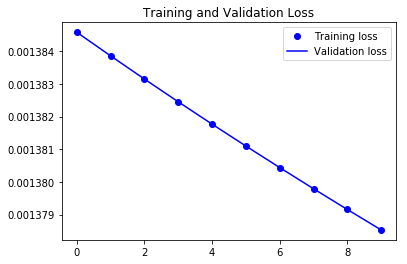

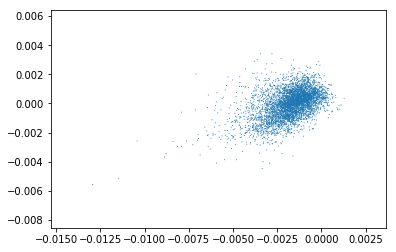

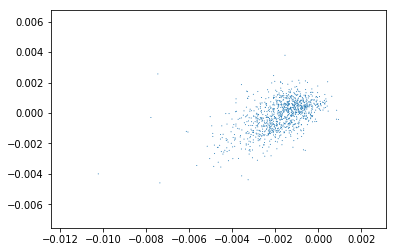

In [18]:
basic_autoencoder(testmain)

In [28]:
from keras.layers import Lambda

def less_basic_autoencoder(data):
    x_train = data
    # x_train = x_train.reshape((1, -1))
    x_train = x_train.transpose()  # transpose so that axis 0 is samples.
    
    inputLayer = Input(shape=(x_train.shape[1],))  # fixed

    l = inputLayer
    l = Dense(256, activation='relu')(l)
    l = Dense(128, activation='relu')(l)
    l = Dense(16, activation='relu')(l)
    l = Dense(8)(l)

    latent_space = l

    l2 = Dense(16, activation='relu')(l)
    l2 = Dense(128, activation='relu')(l2)
    l2 = Dense(256, activation='relu')(l2)
    l2 = Dense(1678, activation='linear')(l2)

    out_layer = l2
    
    auto_model = Model(input=inputLayer, output=[out_layer, latent_space])
    
    latent_input = Input(shape=(2,))
    decoder = functools.reduce(lambda x,y:y(x), decoder_layers, latent_input)
    inverse_model = Model(input=latent_input, output=decoder)
    
    auto_model.compile(loss=['mean_squared_error',tsne], optimizer='sgd')


In [29]:
less_basic_autoencoder(testmain)

c:\users\matej\envs\masters\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=[<tf.Tenso...)`


NameError: name 'functools' is not defined